In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import os
import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io

In [2]:
data = []
#Value that determines by how much the data augmentation method should create new data

with open('mnist_digits_data.txt') as f:
  lines = f.readlines()
  # print(len(lines))
  for line in lines:
    
    line = line.split('  ')
    line.pop(0)
    line[-1] = line[-1].replace("\n", "")
    for idx in range(len(line)):
      line[idx] = int(line[idx])

    # print(len(line))
    data.append(line)

data = np.asarray(data)

#Create a second set of labels for the original dataset
labels_original_data = np.zeros(200)
for i in range (1, 10):
  labels_original_data = np.concatenate((labels_original_data, np.zeros(200)+i))

#Normalize the pixel values between 0-1
data = data / np.amax(data)

In [3]:
data3d = np.reshape(data, (2000, 16, 15, 1))

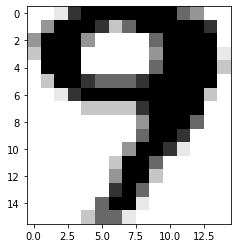

In [4]:
# Show example image of data
from matplotlib import pyplot as plt
plt.imshow(data3d[1999], cmap = 'Greys', interpolation='nearest')
plt.show()

In [5]:
# Define augmentation functions

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 20% on the left and 20% on the right
    random_degree = random.uniform(-20, 20)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image using gaussian, can also be changed so salt and pepper for example: (s&p, )
    return sk.util.random_noise(image_array, mode = 'gaussian')


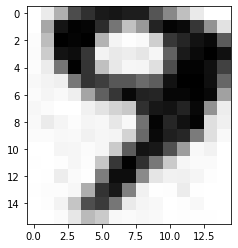

In [6]:
# show example of noise and rotation
rot = random_noise(data3d[1999])
rot = random_rotation(rot)

from matplotlib import pyplot as plt
plt.imshow(rot, cmap = 'Greys', interpolation='nearest')
plt.show()

In [7]:
num_rot = 2 # number of rotated images to augment from each original image
num_noise = 2 # number of noise image augmented from each original image
data_augmented = []

for image in data3d:
    for i in range(num_rot):
        rot_img = random_rotation(image)
        data_augmented.append(rot_img)
    for j in range(num_noise):
        noise_img = random_noise(image)
        data_augmented.append(rot_img)

data_augmented = np.array(data_augmented)
data_augmented.shape

   

(8000, 16, 15, 1)

In [10]:
data_augmented.shape[0]/len(data)

4.0

In [11]:
#labels for augmented data
labels_aug = np.zeros(200 * int(data_augmented.shape[0]/len(data)))
for i in range (1, 10):
  labels_aug = np.concatenate((labels_aug, np.zeros(200* int(data_augmented.shape[0]/len(data)))+i))

In [12]:
# Split in train and test data
X_train, X_test, y_train, y_test = train_test_split(data_augmented, labels_aug, test_size=0.2, random_state=0)

Code below can be performed optionally. With the ImageDataGenerator also shifts and zooms are performed for example. An object is created which can directly be fed to our model.

In [14]:
# Split in train and test data, can be done for already augmented rotation/noise data, but also on original data
X_train, X_test, y_train, y_test = train_test_split(data3d, labels_original_data, test_size=0.2, random_state=0)

In [15]:
# Define image data generator for online data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [16]:
# Create augmenteted data to feed network
batch_size = 8
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)